<a href="https://colab.research.google.com/github/nullvoid-ky/introduction-to-machine-learning-and-deep-learning/blob/main/Utility/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR


In [9]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/linear_regression_exam.csv')
df.head()


,Hours_Studied,Exam_Score
0,1,52
1,2,56
2,3,61
3,4,63
4,5,66


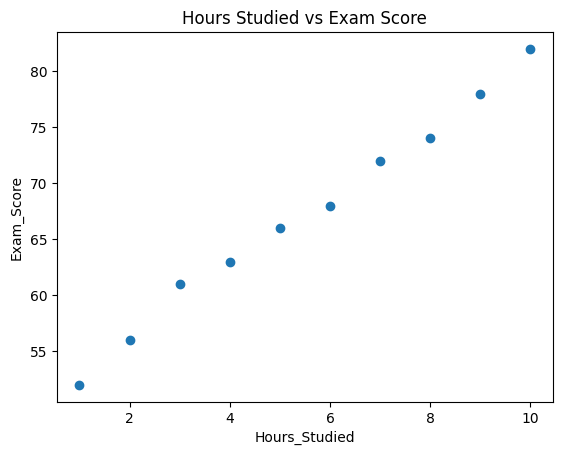

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours Studied vs Exam Score')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied']]   # independent variable(s)
y = df['Exam_Score']        # dependent variable

In [32]:
X

,Hours_Studied
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [33]:
y

,Exam_Score
0,52
1,56
2,61
3,63
4,66
5,68
6,72
7,74
8,78
9,82


In [43]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)
print(y_pred)


[78.23275862 56.26724138]


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.06279726516052142
R² Score: 0.9994810143375163


# MULTI LINEAR

In [47]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/multiple_regression_exam.csv')
df.head()


,Hours_Studied,Sleep_Hours,Tutoring_Sessions,Exam_Score
0,1,5,0,49
1,2,6,1,55
2,3,6,1,59
3,4,7,1,63
4,5,6,2,66


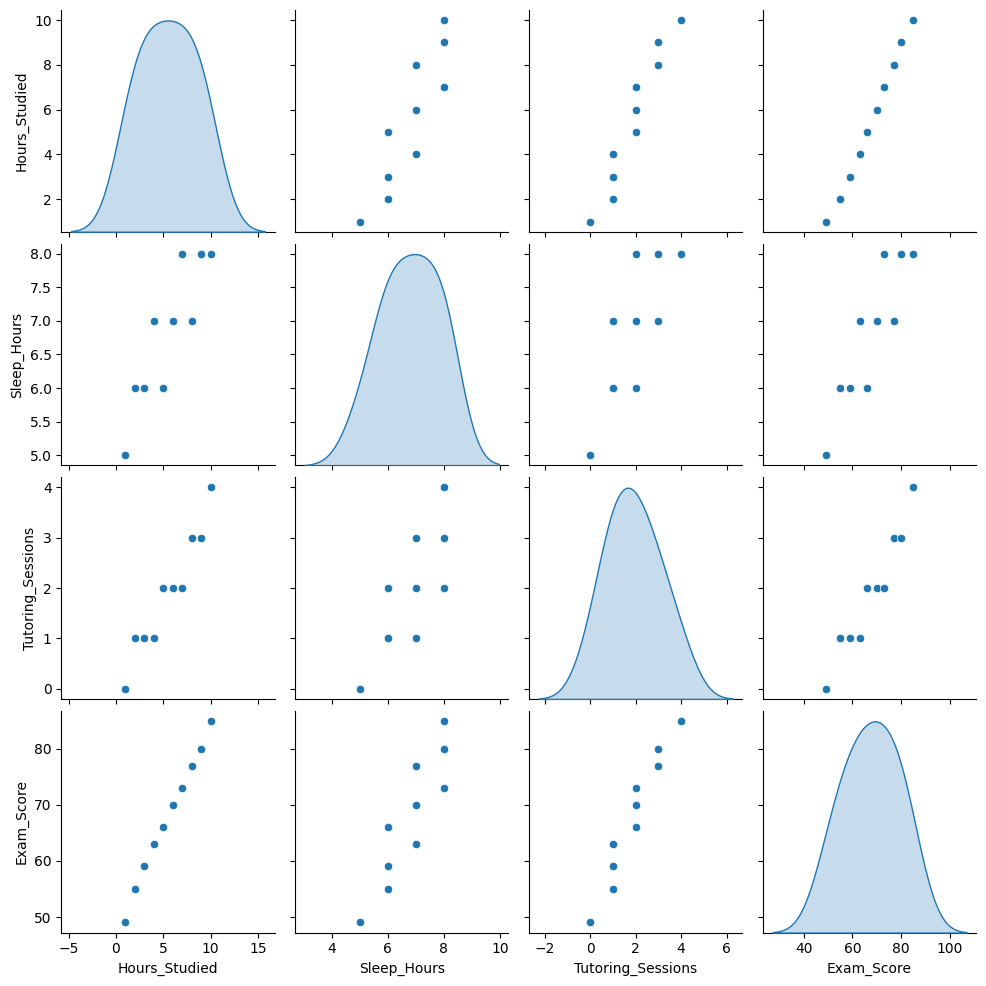

In [48]:
import seaborn as sns

sns.pairplot(df, diag_kind="kde")

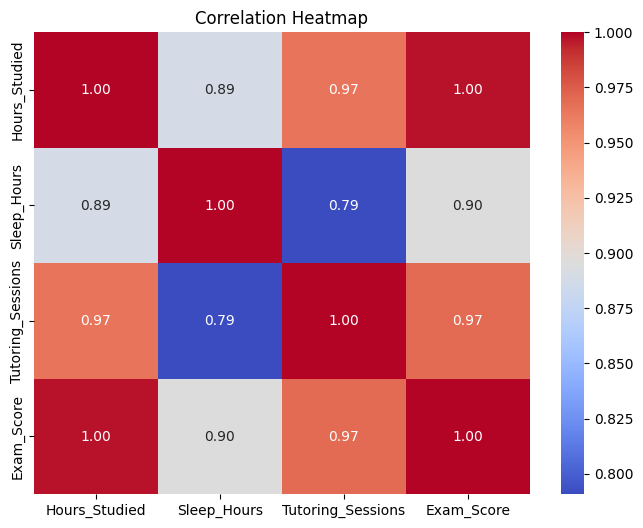

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


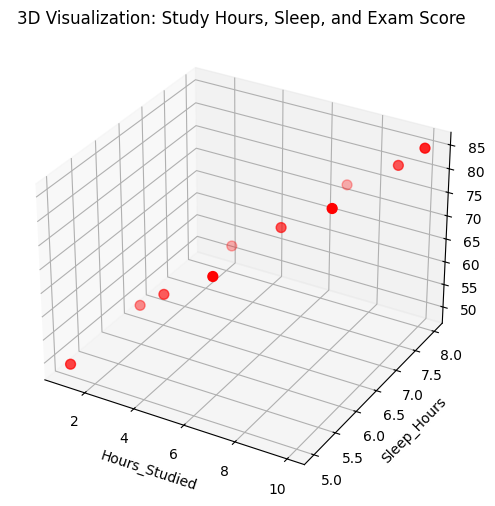

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Hours_Studied'], df['Sleep_Hours'], df['Exam_Score'], c='red', s=50)
ax.set_xlabel('Hours_Studied')
ax.set_ylabel('Sleep_Hours')
ax.set_zlabel('Exam_Score')
plt.title('3D Visualization: Study Hours, Sleep, and Exam Score')
plt.show()


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions']]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [52]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

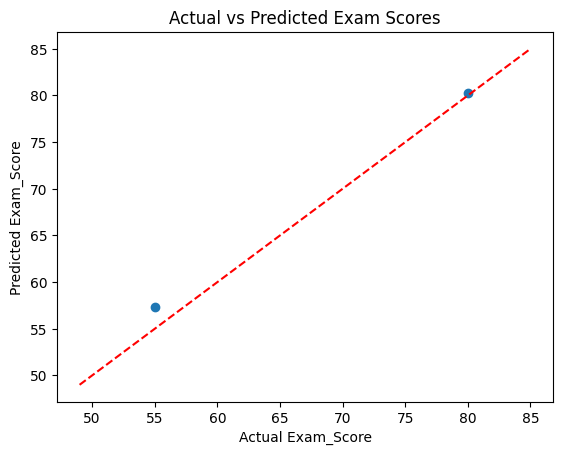

In [53]:


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluation Metrics")
print("------------------------")
print(f"MAE  (Mean Absolute Error): {mae:.3f}")
print(f"MSE  (Mean Squared Error):  {mse:.3f}")
print(f"RMSE (Root Mean Squared):   {rmse:.3f}")
print(f"R²   (R-squared Score):     {r2:.3f}")


📊 Evaluation Metrics
------------------------
MAE  (Mean Absolute Error): 1.302
MSE  (Mean Squared Error):  2.791
RMSE (Root Mean Squared):   1.671
R²   (R-squared Score):     0.982


# POLYNOMIAL


In [55]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/polynomial_regression_exam.csv')
df.head()


,Experience_Years,Salary
0,1,25
1,2,28
2,3,35
3,4,48
4,5,65


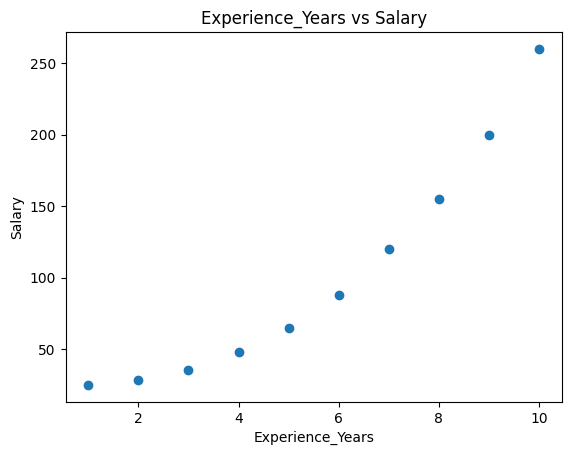

In [57]:
import matplotlib.pyplot as plt

plt.scatter(df['Experience_Years'], df['Salary'])
plt.xlabel('Experience_Years')
plt.ylabel('Salary')
plt.title('Experience_Years vs Salary')
plt.show()


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [59]:
X = df[['Experience_Years']]
y = df['Salary']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [84]:

model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [85]:

y_pred = model.predict(X_poly)

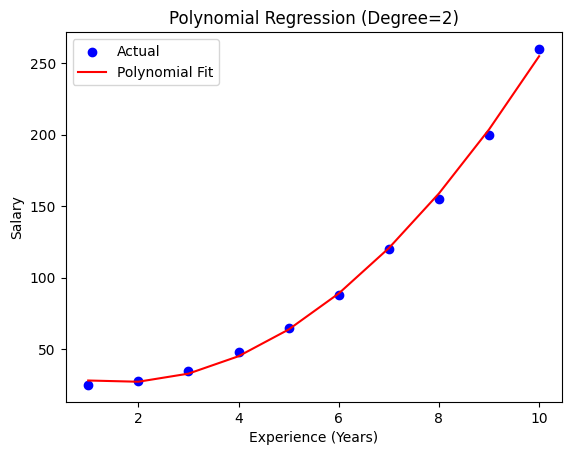

In [86]:
import numpy as np

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree=2)')
plt.legend()
plt.show()


In [87]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R² Score: 0.999
RMSE: 2.838


In [88]:
experience_new = [[11]]
experience_poly = poly.transform(experience_new)
predicted_salary = model.predict(experience_poly)
print(f"Predicted salary for 11 years experience: {predicted_salary[0]:.2f}")


Predicted salary for 11 years experience: 312.67


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


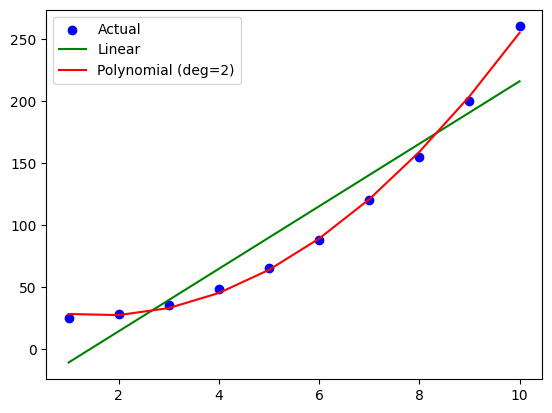

In [89]:
# Linear model for comparison
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_lin_pred, color='green', label='Linear')
plt.plot(X, y_pred, color='red', label='Polynomial (deg=2)')
plt.legend()
plt.show()
